# King County Real Estate

## Overview

This notebook examines King County, WA dataset of houses and reviews how and what renovations add value to a house. 

## Business Problem

The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount

## Data Understanding

### 1. Load the data using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3

%matplotlib inline

In [5]:
kc_house_df = pd.read_csv("data/kc_house_data.csv")

In [6]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

### 2. Data Cleaning

In [11]:
# Dropping null values
kc_house_df.dropna(inplace=True)

In [12]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [13]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The dataset has:
- 25 columns: 10 integers, 5 float, 10 objects.
- 30155 rows. 'heat_source' is the field with the highest amount of null-values: 32. Dropping them allows to keep 99.9% of the data, they were dropped without deteriorating. 



In [7]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### 2.(a). Create subset removing unnecessary columns

The columns below are removed because they do not provide any value to the analysis to understand what renovations add value to a house.
\
Anything pertaining to the house location can be removed: will not have impact on renovations.
- lat 
- long
- address 
- greenbelt
- waterfront

---------------------
To determine
- view???
---------------------

anything pertaining to dataset admin can be removed 
- id 
- date (date house was sold) 



---------------------
to determine later: as recommended: 

     - sqft_above
     - sqft_basement
     - yr_renovated
---------------------

In [8]:
kc_house_subset = kc_house_data.drop(columns=["date", "view", "sqft_above", "sqft_basement", "address", "lat", "long"])

In [9]:
kc_house_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30155 non-null  int64  
 1   price         30155 non-null  float64
 2   bedrooms      30155 non-null  int64  
 3   bathrooms     30155 non-null  float64
 4   sqft_living   30155 non-null  int64  
 5   sqft_lot      30155 non-null  int64  
 6   floors        30155 non-null  float64
 7   waterfront    30155 non-null  object 
 8   greenbelt     30155 non-null  object 
 9   nuisance      30155 non-null  object 
 10  condition     30155 non-null  object 
 11  grade         30155 non-null  object 
 12  heat_source   30123 non-null  object 
 13  sewer_system  30141 non-null  object 
 14  sqft_garage   30155 non-null  int64  
 15  sqft_patio    30155 non-null  int64  
 16  yr_built      30155 non-null  int64  
 17  yr_renovated  30155 non-null  int64  
dtypes: float64(3), int64(8), o

The dataset now has 17 columns

### 3.(a). Data Exploration

Inspect the value counts for the categorical features

In [15]:
categoricals = kc_house_df.select_dtypes(include=[object])

for col in categoricals:
    print(kc_house_df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
1/16/2022       1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 365, dtype: int64 

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20576
Electric

# Comment here about categorical data

### 3. Build a baseline simple linear regression model

#### Identifying a Highly Correlated Predictor

The target variable is price. Looking at correlation coefficients for all predictor variables to find the one with the highest correlation with price.

In [17]:
kc_house_df.corr()["price"].sort_values()

id              -0.034096
long            -0.022278
lat              0.063430
yr_renovated     0.085023
sqft_lot         0.086550
yr_built         0.095796
floors           0.180589
sqft_basement    0.245005
sqft_garage      0.263674
bedrooms         0.288954
sqft_patio       0.313789
bathrooms        0.480337
sqft_above       0.538631
sqft_living      0.608616
price            1.000000
Name: price, dtype: float64

In [18]:
most_correlated = "sqft_living"

#### Plotting the predictor vs price

In [19]:
type(kc_house_df["price"])

pandas.core.series.Series

In [20]:
# Plotting a sample of 1000 data points, most_correlated vs. price

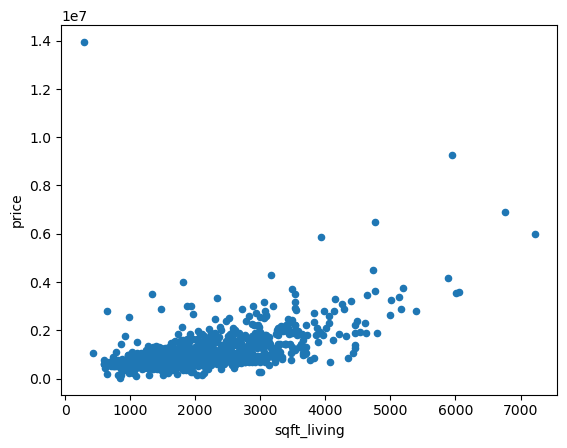

In [22]:
kc_house_df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

# Next: remove the outliers

In [23]:
# for column in dataset: draw box plot?